# PETSc performance breakdown

This notebook runs timing breakdown using PETSc events:

- Warmup + timed solve per approach and mesh size
- Event times: SNESSolve, KSPSolve, PCSetUp, PCApply, Jacobian/Residual evals, MatAssembly
- Outputs a CSV of results

You can tweak the mesh sizes and approaches as needed.

Highly inspired by this work: https://github.com/thomasgibson/tabula-rasa

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np
import pandas as pd
from pathlib import Path
from typing import List
import matplotlib.pyplot as plt

from perphil.experiments.iterative_bench import Approach
from perphil.experiments.petsc_profiling import run_perf_sweep, save_perf_csv

RESULTS_PATH = Path("results-conforming-2d/petsc_profiling")

## Parameters

In [2]:
# mesh_sizes: List[int] = [4, 8, 16, 32, 64, 128]  # this is the one for final results
mesh_sizes: List[int] = [
    4,
    8,
    16,
    32,
    64,
    128,
    256,
]  # this is the one for final results
# mesh_sizes: List[int] = [4, 8, 16, 32, 64]
# mesh_sizes: List[int] = [4, 8, 16, 32]
# mesh_sizes: List[int] = [5, 10, 15, 20]
# mesh_sizes: List[int] = [5, 10, 15, 20]
approaches: List[Approach] = [
    Approach.PLAIN_GMRES,
    Approach.GMRES_ILU,
    Approach.SS_GMRES,
    Approach.SS_GMRES_ILU,
    # Approach.PICARD_MUMPS,
    Approach.MONOLITHIC_MUMPS,
]
extra_events: List[str] = []

## Run and collect

In [3]:
df = run_perf_sweep(mesh_sizes, approaches, repeats=5, backend="events")
df.sort_values(["nx", "approach"])

[perf] nx=4 GMRES: iters=10, time_total=1.325e-02s, KSPSolve=1.566e-04s, PCApply=6.728e-06s, flops_total=8.851e+05 (backend=events, repeats=5)
[perf] nx=4 GMRES + ILU PC: iters=5, time_total=1.109e-02s, KSPSolve=1.597e-04s, PCApply=1.853e-05s, flops_total=8.348e+05 (backend=events, repeats=5)
[perf] nx=4 Scale-Splitting GMRES: iters=4, time_total=3.430e-02s, KSPSolve=2.907e-03s, PCApply=2.776e-03s, flops_total=9.144e+05 (backend=events, repeats=5)
[perf] nx=4 Scale-Splitting GMRES + ILU PC: iters=4, time_total=3.274e-02s, KSPSolve=6.625e-04s, PCApply=5.326e-04s, flops_total=1.582e+06 (backend=events, repeats=5)
[perf] nx=4 Monolithic LU with MUMPS: iters=1, time_total=1.227e-02s, KSPSolve=3.910e-04s, PCApply=3.759e-04s, flops_total=5.946e+05 (backend=events, repeats=5)
[perf] nx=8 GMRES: iters=40, time_total=1.179e-02s, KSPSolve=6.326e-04s, PCApply=2.393e-05s, flops_total=8.905e+06 (backend=events, repeats=5)
[perf] nx=8 GMRES + ILU PC: iters=7, time_total=1.200e-02s, KSPSolve=2.379e-0

,approach,nx,ny,dofs,num_cells,iterations,residual,metadata,time_total,time_total_repeats,...,mflops_KSPSolve,flops_MatAssemblyEnd,mflops_MatAssemblyEnd,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_MatMult,mflops_MatMult,flops_total,mem_rss_peak_kb,mem_rss_delta_kb
0,GMRES,4,4,50,16,10,3.107972e-07,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.013247,0.066235,...,852.737933,0.0,0.0,0.0,0.0,6.510000e+04,3823.339402,8.851200e+05,283820.0,0.0
1,GMRES + ILU PC,4,4,50,16,5,1.936255e-05,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.011086,0.055430,...,588.505963,0.0,0.0,0.0,0.0,3.255000e+04,3471.629693,8.348100e+05,284316.0,496.0
4,Monolithic LU with MUMPS,4,4,50,16,1,0.000000e+00,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.012274,0.061371,...,26.652207,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,5.946000e+05,292764.0,0.0
2,Scale-Splitting GMRES,4,4,50,16,4,4.775965e-05,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.034299,0.171495,...,25.131557,0.0,0.0,0.0,0.0,3.386500e+04,2195.888990,9.144150e+05,290076.0,2304.0
3,Scale-Splitting GMRES + ILU PC,4,4,50,16,4,4.775968e-05,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.032740,0.163698,...,414.296387,0.0,0.0,0.0,0.0,9.646500e+04,3053.849563,1.581590e+06,292764.0,2112.0
5,GMRES,8,8,162,64,40,3.795447e-04,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.011786,0.058928,...,4498.309281,0.0,0.0,0.0,0.0,9.917900e+05,5541.809851,8.905370e+06,292764.0,0.0
6,GMRES + ILU PC,8,8,162,64,7,2.493865e-03,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.012001,0.060006,...,2041.666316,0.0,0.0,0.0,0.0,1.693300e+05,4832.890944,3.715780e+06,292764.0,0.0
9,Monolithic LU with MUMPS,8,8,162,64,1,0.000000e+00,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.012516,0.062582,...,105.041308,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,2.471880e+06,294492.0,0.0
7,Scale-Splitting GMRES,8,8,162,64,4,4.663785e-03,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.034046,0.170229,...,94.950492,0.0,0.0,0.0,0.0,1.259850e+05,3508.354219,3.762305e+06,292956.0,192.0
8,Scale-Splitting GMRES + ILU PC,8,8,162,64,4,4.663785e-03,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.033188,0.165940,...,1596.193866,0.0,0.0,0.0,0.0,5.000650e+05,4590.110516,7.789820e+06,294300.0,1152.0


## Save CSV (optional)

In [4]:
save_perf_csv(df, RESULTS_PATH / "petsc_perf_breakdown.csv")
df.head()

,approach,nx,ny,dofs,num_cells,iterations,residual,metadata,time_total,time_total_repeats,...,mflops_KSPSolve,flops_MatAssemblyEnd,mflops_MatAssemblyEnd,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_MatMult,mflops_MatMult,flops_total,mem_rss_peak_kb,mem_rss_delta_kb
0,GMRES,4,4,50,16,10,3.107972e-07,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.013247,0.066235,...,852.737933,0.0,0.0,0.0,0.0,65100.0,3823.339402,885120.0,283820.0,0.0
1,GMRES + ILU PC,4,4,50,16,5,1.936255e-05,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.011086,0.055430,...,588.505963,0.0,0.0,0.0,0.0,32550.0,3471.629693,834810.0,284316.0,496.0
2,Scale-Splitting GMRES,4,4,50,16,4,4.775965e-05,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.034299,0.171495,...,25.131557,0.0,0.0,0.0,0.0,33865.0,2195.888990,914415.0,290076.0,2304.0
3,Scale-Splitting GMRES + ILU PC,4,4,50,16,4,4.775968e-05,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.032740,0.163698,...,414.296387,0.0,0.0,0.0,0.0,96465.0,3053.849563,1581590.0,292764.0,2112.0
4,Monolithic LU with MUMPS,4,4,50,16,1,0.000000e+00,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.012274,0.061371,...,26.652207,0.0,0.0,0.0,0.0,0.0,0.000000,594600.0,292764.0,0.0


## Plots

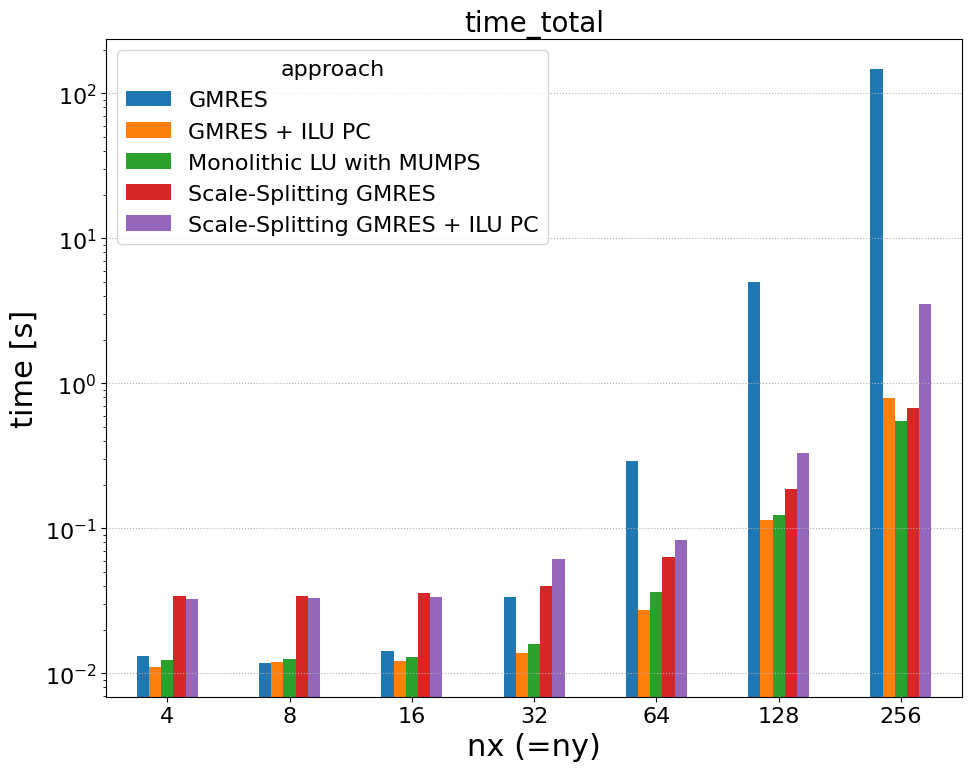

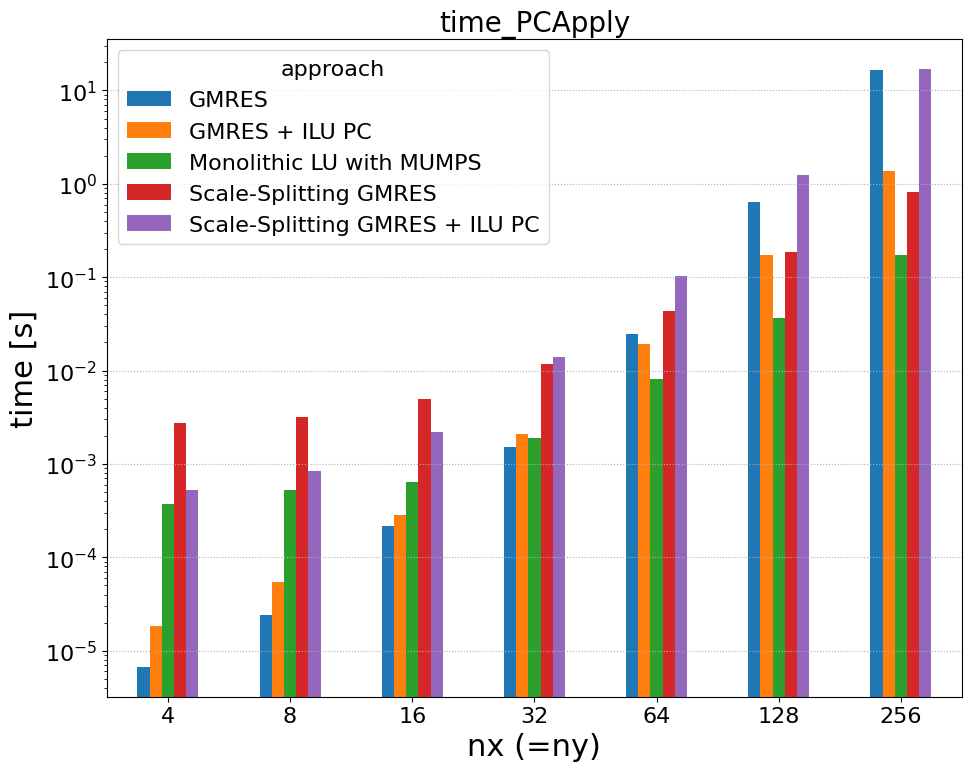

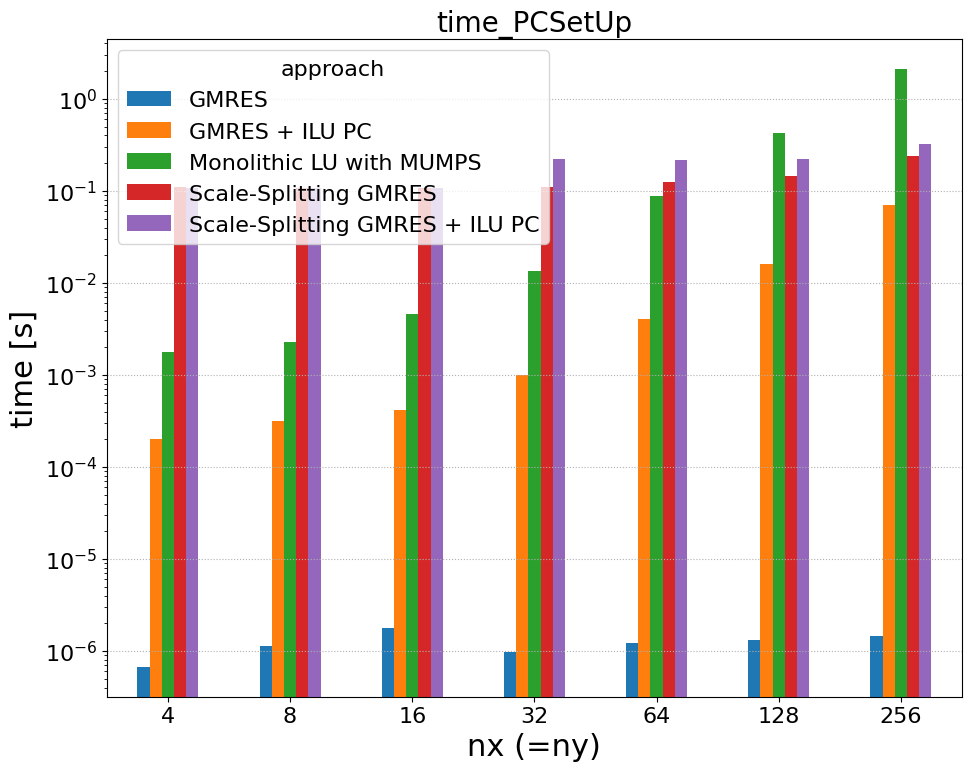

In [5]:
for metric in ("time_total", "time_PCApply", "time_PCSetUp"):
    pivot = df.pivot(index="nx", columns="approach", values=metric).sort_index()
    ax = pivot.plot(kind="bar", figsize=(10, 8), title=metric, logy=True, rot=0)
    ax.set_xlabel("nx (=ny)")
    ax.set_ylabel("time [s]")
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"petsc_{metric}_bar.png")
    plt.show()

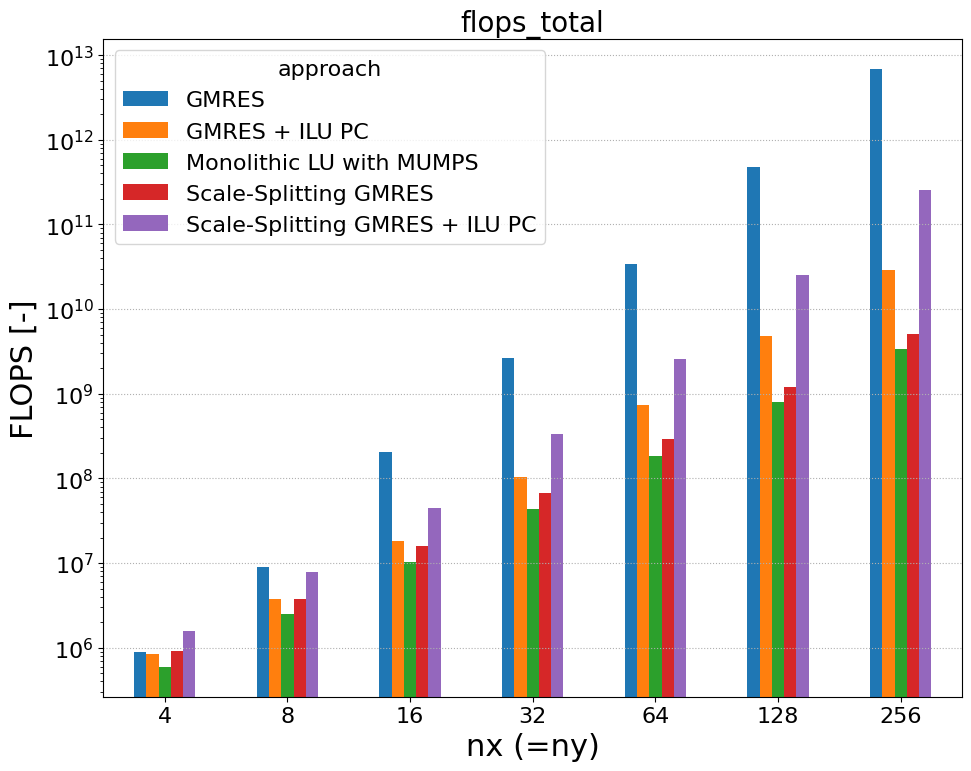

In [6]:
pivot = df.pivot(index="nx", columns="approach", values="flops_total").sort_index()
ax = pivot.plot(kind="bar", figsize=(10, 8), title="flops_total", logy=True, rot=0)
ax.set_xlabel("nx (=ny)")
ax.set_ylabel("FLOPS [-]")
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / "petsc_flops_bar.png")
plt.show()

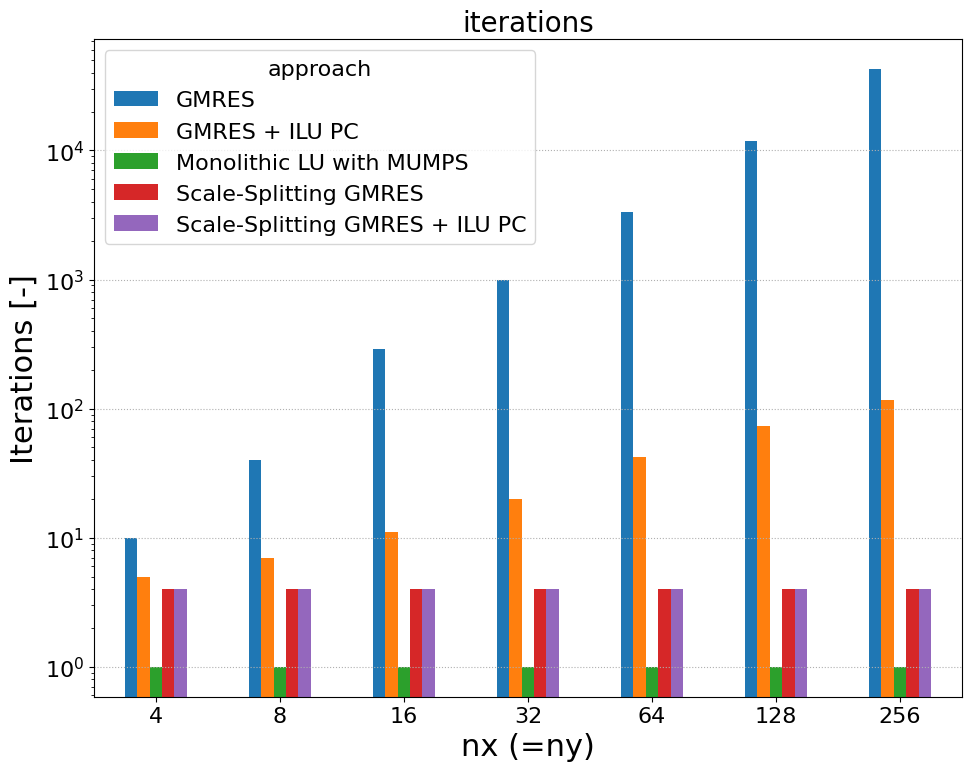

In [7]:
pivot = df.pivot(index="nx", columns="approach", values="iterations").sort_index()
ax = pivot.plot(kind="bar", figsize=(10, 8), title="iterations", logy=True, rot=0)
ax.set_xlabel("nx (=ny)")
ax.set_ylabel("Iterations [-]")
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / "petsc_iterations_bar.png")
plt.show()

In [8]:
df_picard = df[df["approach"].str.contains("Picard")]

df_picard_per_iteration = pd.DataFrame(
    {
        "approach": df_picard["approach"],
        "num_cells": df_picard["num_cells"],
        "solve_per_iteration": df_picard["time_SNESSolve"] / df_picard["iterations"],
        "time_per_iteration": df_picard["time_total"] / df_picard["iterations"],
    }
)

df_picard_per_iteration

,approach,num_cells,solve_per_iteration,time_per_iteration


In [9]:
df_gmres = df[df["approach"].str.contains("GMRES")]

df_gmres_per_iteration = pd.DataFrame(
    {
        "approach": df_gmres["approach"],
        "num_cells": df_gmres["num_cells"],
        "solve_per_iteration": df_gmres["time_KSPSolve"] / df_gmres["iterations"],
        "time_per_iteration": df_gmres["time_total"] / df_gmres["iterations"],
        "pc_factorization_per_time": df_gmres["time_PCSetUp"] / df_gmres["time_total"],
        "pc_application_per_time": df_gmres["time_PCApply"] / df_gmres["time_total"],
    }
)

df_gmres_per_iteration

,approach,num_cells,solve_per_iteration,time_per_iteration,pc_factorization_per_time,pc_application_per_time
0,GMRES,16,0.000016,0.001325,5.072862e-05,0.000508
1,GMRES + ILU PC,16,0.000032,0.002217,1.816165e-02,0.001672
2,Scale-Splitting GMRES,16,0.000727,0.008575,3.225413e+00,0.080926
3,Scale-Splitting GMRES + ILU PC,16,0.000166,0.008185,3.295019e+00,0.016268
5,GMRES,64,0.000016,0.000295,9.681284e-05,0.002030
6,GMRES + ILU PC,64,0.000034,0.001714,2.615228e-02,0.004571
7,Scale-Splitting GMRES,64,0.000835,0.008511,3.165657e+00,0.094060
8,Scale-Splitting GMRES + ILU PC,64,0.000241,0.008297,3.260391e+00,0.025109
10,GMRES,256,0.000032,0.000048,1.251529e-04,0.015350
11,GMRES + ILU PC,256,0.000061,0.001100,3.469484e-02,0.023495


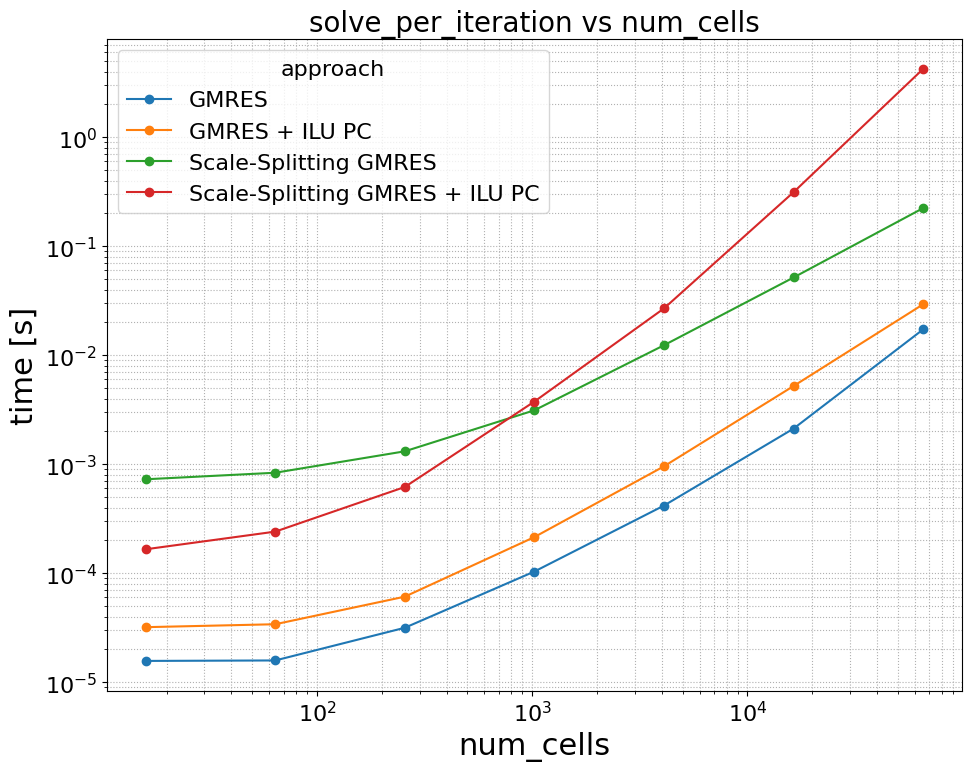

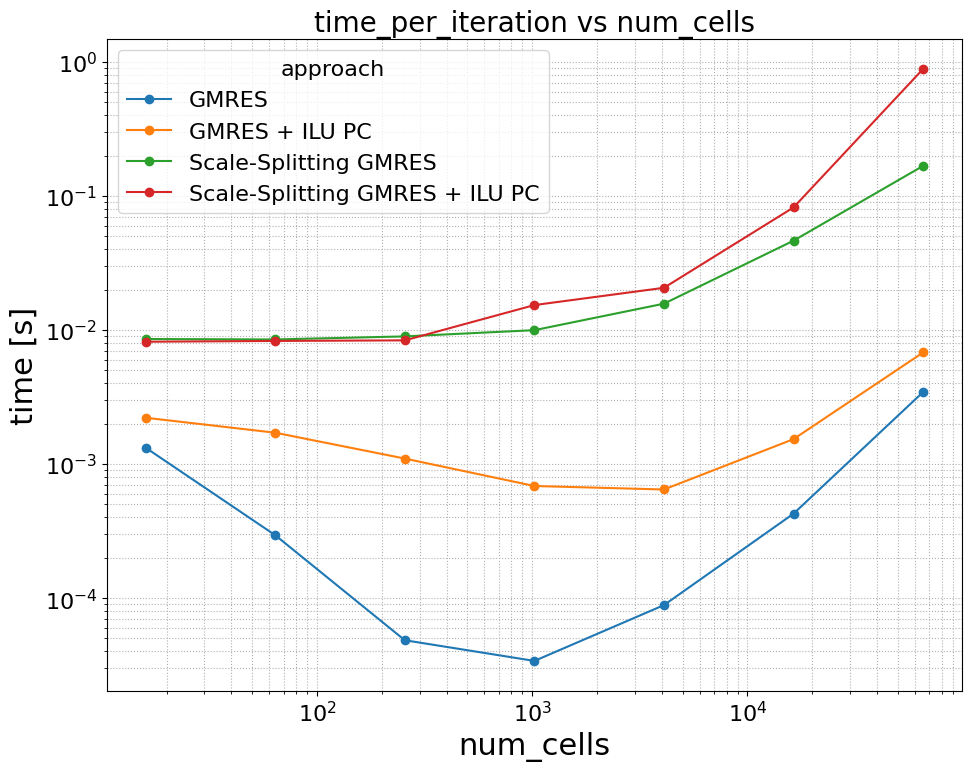

In [10]:
for metric in ("solve_per_iteration", "time_per_iteration"):
    pivot = df_gmres_per_iteration.pivot(
        index="num_cells", columns="approach", values=metric
    ).sort_index()
    ax = pivot.plot(
        marker="o",
        figsize=(10, 8),
        title=f"{metric} vs num_cells",
        logx=True,
        logy=True,
    )
    ax.set_xlabel("num_cells")
    ax.set_ylabel("time [s]")
    ax.grid(which="both", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"{metric}_scaling.png")
    plt.show()

 Where total time goes (per approach) for a fixed nx:

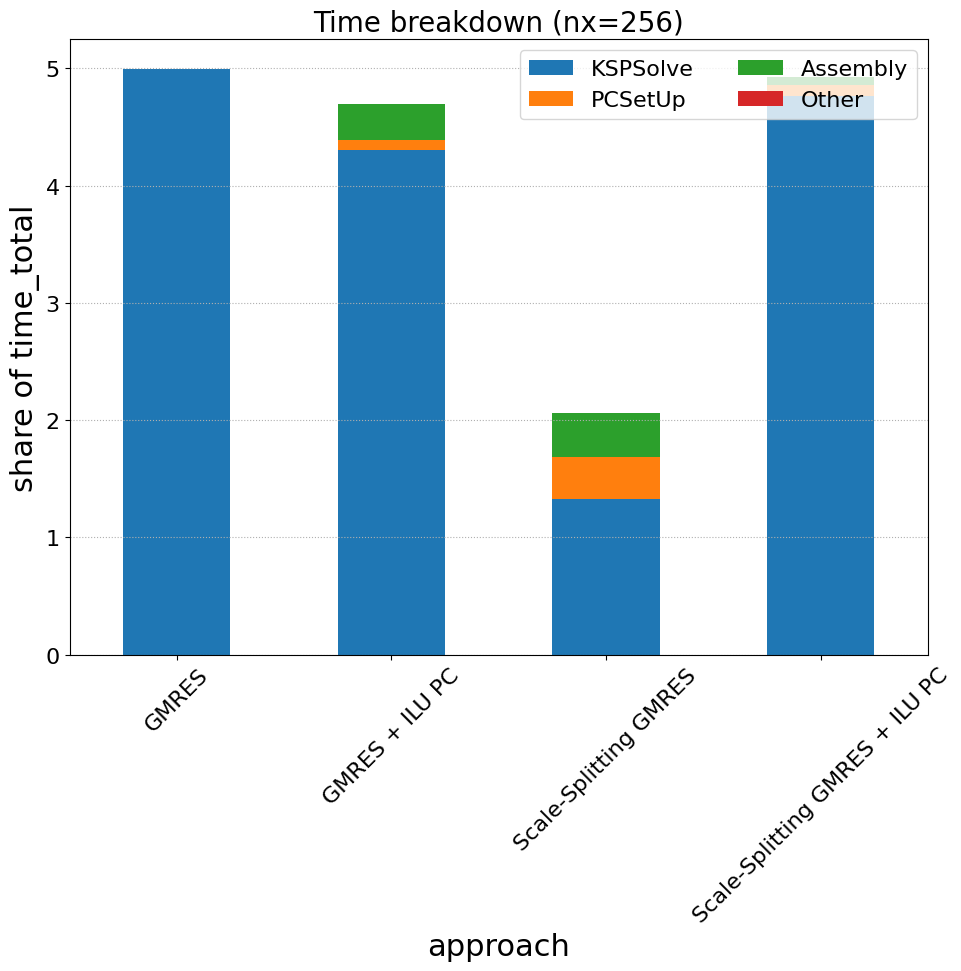

In [11]:
nx_target = int(df["nx"].max())
dft = df[(df["nx"] == nx_target) & (df["approach"].str.contains("GMRES"))].copy()

assembly = (
    dft.get("time_SNESFunctionEval", 0.0)
    + dft.get("time_SNESJacobianEval", 0.0)
    + dft.get("time_MatAssemblyBegin", 0.0)
    + dft.get("time_MatAssemblyEnd", 0.0)
)

comp = pd.DataFrame(
    {
        "approach": dft["approach"],
        "KSPSolve": dft.get("time_KSPSolve", 0.0),
        "PCSetUp": dft.get("time_PCSetUp", 0.0),
        "Assembly": assembly,
    }
)
comp["Other"] = (
    dft["time_total"] - comp[["KSPSolve", "PCSetUp", "Assembly"]].sum(axis=1)
).clip(lower=0)
share = comp.set_index("approach").div(dft["time_total"].values, axis=0)

ax = share.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 10),
    title=f"Time breakdown (nx={nx_target})",
    rot=45,
)
ax.set_ylabel("share of time_total")
ax.legend(loc="upper right", ncols=2)
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / f"time_breakdown_nx{nx_target}.png")
plt.show()

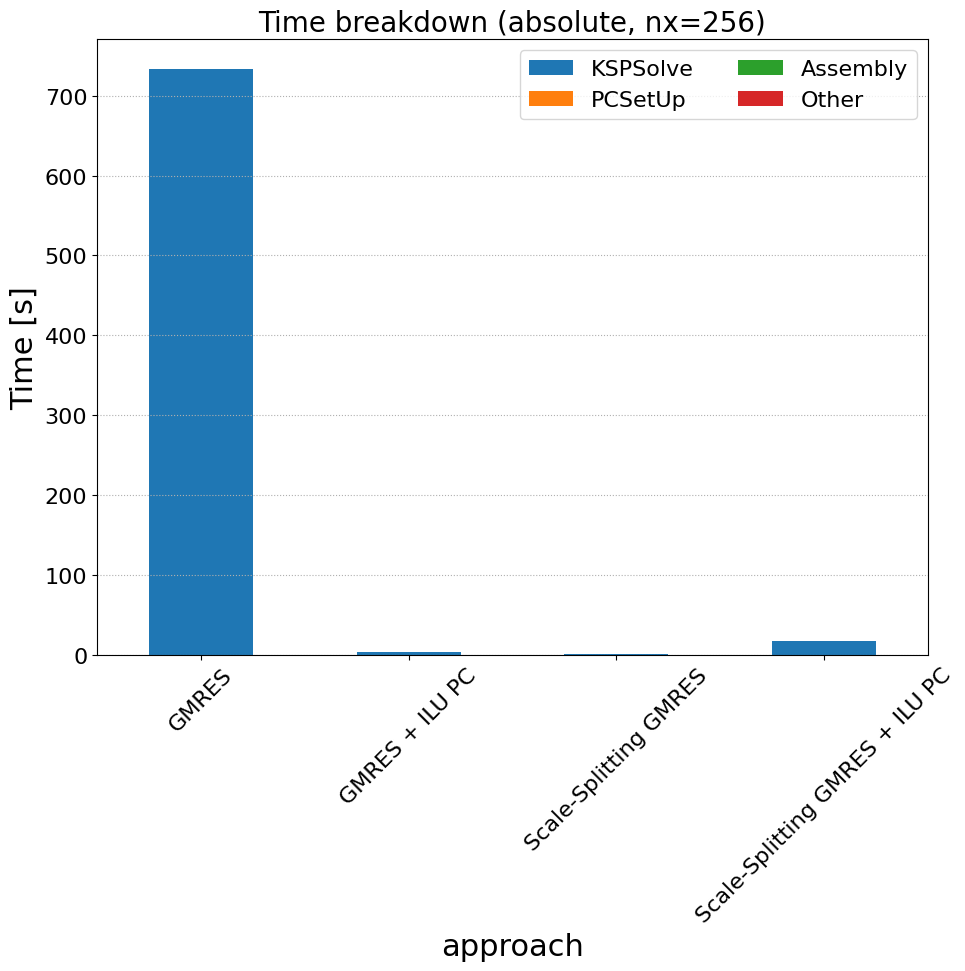

In [12]:
nx_target = int(df["nx"].max())
dft = df[(df["nx"] == nx_target) & (df["approach"].str.contains("GMRES"))].copy()

assembly = (
    dft.get("time_SNESFunctionEval", 0.0)
    + dft.get("time_SNESJacobianEval", 0.0)
    + dft.get("time_MatAssemblyBegin", 0.0)
    + dft.get("time_MatAssemblyEnd", 0.0)
)

comp = pd.DataFrame(
    {
        "approach": dft["approach"],
        "KSPSolve": dft.get("time_KSPSolve", 0.0),
        "PCSetUp": dft.get("time_PCSetUp", 0.0),
        "Assembly": assembly,
    }
)

comp["Other"] = (
    dft["time_total"] - comp[["KSPSolve", "PCSetUp", "Assembly"]].sum(axis=1)
).clip(lower=0.0)

ax = comp.set_index("approach").plot(
    kind="bar",
    stacked=True,
    figsize=(10, 10),
    title=f"Time breakdown (absolute, nx={nx_target})",
    rot=45,
)
ax.set_ylabel("Time [s]")
ax.legend(loc="upper right", ncols=2)
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / f"time_breakdown_absolute_nx{nx_target}.png")
plt.show()

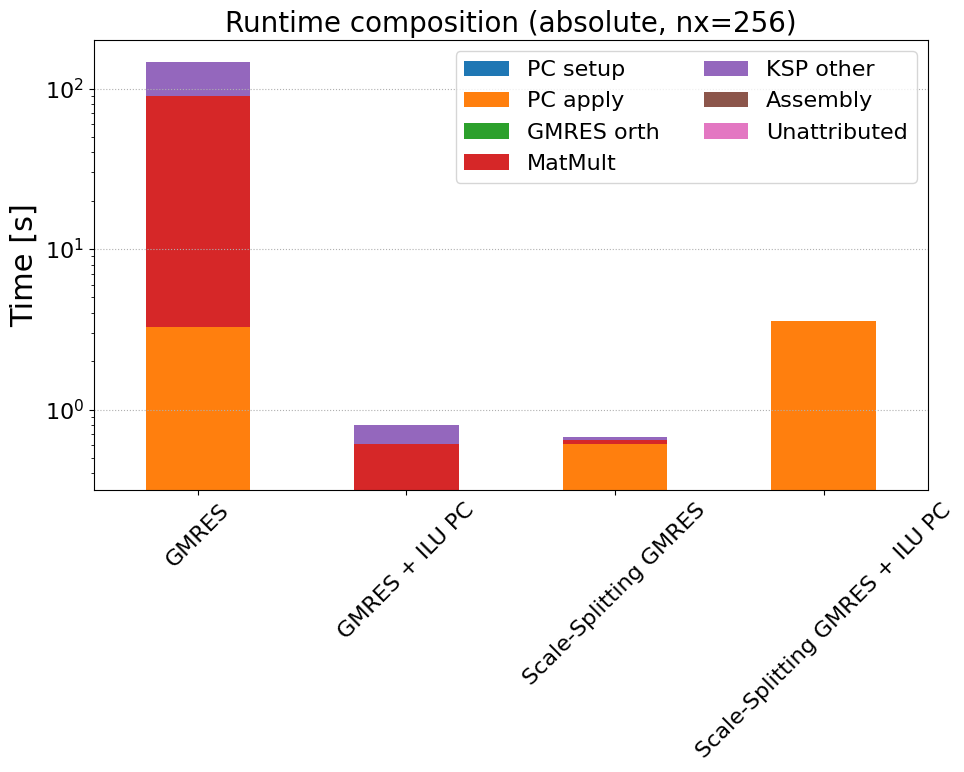

In [23]:
# Runtime composition (absolute, constrained to wall time_total)
nx_target = int(df["nx"].max())
dft = df[
    (df["nx"] == nx_target) & (df["approach"].astype(str).str.contains("GMRES"))
].copy()


def _assembly_row(r):
    return (
        float(r.get("time_SNESFunctionEval", 0.0))
        + float(r.get("time_SNESJacobianEval", 0.0))
        + float(r.get("time_MatAssemblyBegin", 0.0))
        + float(r.get("time_MatAssemblyEnd", 0.0))
    )


def _partition_row_wall(r):
    tot = max(float(r.get("time_total", 0.0)), 0.0)
    ksp = max(float(r.get("time_KSPSolve", 0.0)), 0.0)
    pcsetup = max(float(r.get("time_PCSetUp", 0.0)), 0.0)
    pcapply = max(float(r.get("time_PCApply", 0.0)), 0.0)
    matmult_all = max(float(r.get("time_MatMult", 0.0)), 0.0)
    gmres_orth_all = max(
        float(r.get("time_KSPGMRESOrthogonalization", 0.0)), 0.0
    ) + max(float(r.get("time_KSPGMRESBuildBasis", 0.0)), 0.0)
    assembly_all = max(_assembly_row(r), 0.0)

    # 1) Inside-KSP exclusive parts (cap by ksp)
    rem_ksp = ksp
    pcapply_ex = min(pcapply, rem_ksp)
    rem_ksp -= pcapply_ex
    gmres_orth_ex = min(gmres_orth_all, rem_ksp)
    rem_ksp -= gmres_orth_ex
    matmult_ex = min(matmult_all, rem_ksp)
    rem_ksp -= matmult_ex
    ksp_other = max(rem_ksp, 0.0)

    # If KSP internals exceed wall time, rescale to fit tot
    ksp_sum = pcapply_ex + gmres_orth_ex + matmult_ex + ksp_other
    if tot > 0.0 and ksp_sum > tot:
        scale = tot / ksp_sum
        pcapply_ex *= scale
        gmres_orth_ex *= scale
        matmult_ex *= scale
        ksp_other *= scale
        ksp_sum = pcapply_ex + gmres_orth_ex + matmult_ex + ksp_other

    # 2) Outside-KSP from remaining wall time
    rem_out = max(tot - ksp_sum, 0.0)
    pcsetup_ex = min(pcsetup, rem_out)
    rem_out -= pcsetup_ex
    assembly_ex = min(assembly_all, rem_out)
    rem_out -= assembly_ex
    unattributed = max(rem_out, 0.0)

    return pd.Series(
        {
            "PC setup": pcsetup_ex,
            "PC apply": pcapply_ex,
            "GMRES orth": gmres_orth_ex,
            "MatMult": matmult_ex,
            "KSP other": ksp_other,
            "Assembly": assembly_ex,
            "Unattributed": unattributed,
        }
    )


parts = dft.apply(_partition_row_wall, axis=1)

# Sanity: rows sum to wall time_total
err = (parts.sum(axis=1) - dft["time_total"].astype(float)).abs()
assert (err < 1e-9).all() or (err / dft["time_total"].replace(0, np.nan) < 1e-6).all()

# Plot absolute seconds (stack sums to time_total)
parts.index = dft["approach"].astype(str).values
ax = parts.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 8),
    title=f"Runtime composition (absolute, nx={nx_target})",
    rot=45,
    logy=True,
)
ax.set_ylabel("Time [s]")
ax.legend(loc="upper right", ncols=2)
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / f"time_breakdown_wall_absolute_nx{nx_target}.png")
plt.show()

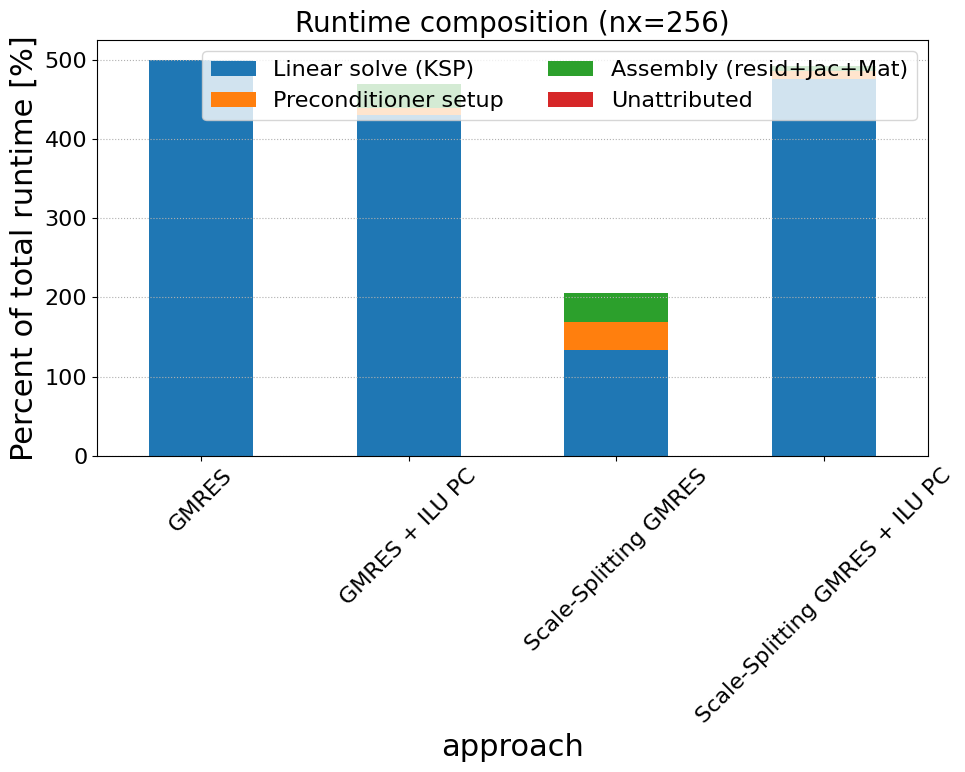

In [14]:
comp = pd.DataFrame(
    {
        "approach": dft["approach"],
        "KSPSolve": dft.get("time_KSPSolve", 0.0),
        "PCSetUp": dft.get("time_PCSetUp", 0.0),
        "Assembly": assembly,
    }
)
comp["Unattributed"] = (
    dft["time_total"] - comp[["KSPSolve", "PCSetUp", "Assembly"]].sum(axis=1)
).clip(lower=0)

# Fraction and percent of total runtime
fraction = (
    comp.set_index("approach").div(dft["time_total"].values, axis=0).clip(lower=0.0)
)
percent = 100.0 * fraction
percent = percent.rename(
    columns={
        "KSPSolve": "Linear solve (KSP)",
        "PCSetUp": "Preconditioner setup",
        "Assembly": "Assembly (resid+Jac+Mat)",
        "Unattributed": "Unattributed",
    }
)

ax = percent.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 8),
    title=f"Runtime composition (nx={nx_target})",
    rot=45,
)
ax.set_ylabel("Percent of total runtime [%]")
ax.legend(loc="upper right", ncols=2)
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / f"time_breakdown_percent_nx{nx_target}.png")
plt.show()

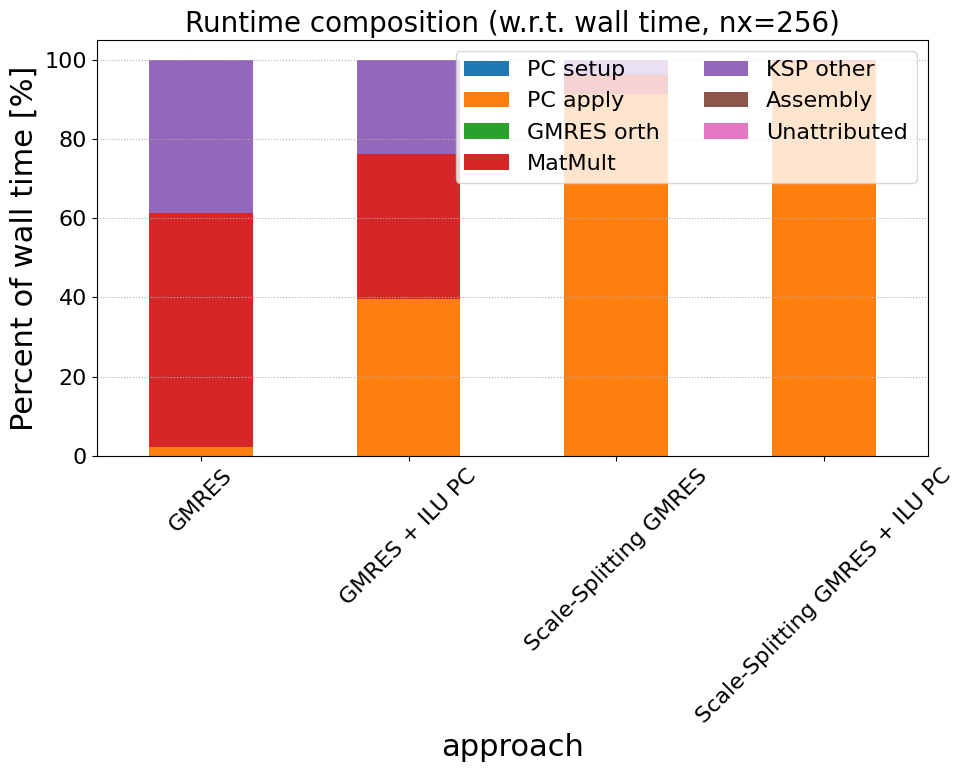

In [15]:
# Runtime composition w.r.t. wall time (forces sum == time_total)
nx_target = int(df["nx"].max())
dft = df[(df["nx"] == nx_target) & (df["approach"].str.contains("GMRES"))].copy()


def _assembly_row(r):
    return (
        float(r.get("time_SNESFunctionEval", 0.0))
        + float(r.get("time_SNESJacobianEval", 0.0))
        + float(r.get("time_MatAssemblyBegin", 0.0))
        + float(r.get("time_MatAssemblyEnd", 0.0))
    )


def _partition_row_wall(r):
    tot = max(float(r.get("time_total", 0.0)), 0.0)
    ksp = max(float(r.get("time_KSPSolve", 0.0)), 0.0)
    pcsetup = max(float(r.get("time_PCSetUp", 0.0)), 0.0)
    pcapply = max(float(r.get("time_PCApply", 0.0)), 0.0)
    matmult_all = max(float(r.get("time_MatMult", 0.0)), 0.0)
    gmres_orth_all = max(
        float(r.get("time_KSPGMRESOrthogonalization", 0.0)), 0.0
    ) + max(float(r.get("time_KSPGMRESBuildBasis", 0.0)), 0.0)
    assembly_all = max(_assembly_row(r), 0.0)

    # 1) Build KSP-internal exclusive parts (capped by ksp)
    rem_ksp = ksp
    pcapply_ex = min(pcapply, rem_ksp)
    rem_ksp -= pcapply_ex
    gmres_orth_ex = min(gmres_orth_all, rem_ksp)
    rem_ksp -= gmres_orth_ex
    matmult_ex = min(matmult_all, rem_ksp)
    rem_ksp -= matmult_ex
    ksp_other = max(rem_ksp, 0.0)

    # If KSP > wall time, rescale all KSP-internal parts to fit in tot
    ksp_sum = pcapply_ex + gmres_orth_ex + matmult_ex + ksp_other
    scale = 1.0
    if tot > 0.0 and ksp_sum > tot:
        scale = tot / ksp_sum
    pcapply_ex *= scale
    gmres_orth_ex *= scale
    matmult_ex *= scale
    ksp_other *= scale
    ksp_sum = pcapply_ex + gmres_orth_ex + matmult_ex + ksp_other

    # 2) Allocate outside-KSP from remaining wall time
    rem_out = max(tot - ksp_sum, 0.0)
    pcsetup_ex = min(pcsetup, rem_out)
    rem_out -= pcsetup_ex
    assembly_ex = min(assembly_all, rem_out)
    rem_out -= assembly_ex
    unattributed = max(rem_out, 0.0)

    return pd.Series(
        {
            "PC setup": pcsetup_ex,
            "PC apply": pcapply_ex,
            "GMRES orth": gmres_orth_ex,
            "MatMult": matmult_ex,
            "KSP other": ksp_other,
            "Assembly": assembly_ex,
            "Unattributed": unattributed,
        }
    )


parts = dft.apply(_partition_row_wall, axis=1)

# Sanity: now rows sum to wall time_total (within fp error)
err = (parts.sum(axis=1) - dft["time_total"]).abs()
assert (err < 1e-9).all() or (err / dft["time_total"].replace(0, np.nan) < 1e-6).all()

percent = 100.0 * parts.div(dft["time_total"].values, axis=0)
ax = percent.set_index(dft["approach"]).plot(
    kind="bar",
    stacked=True,
    figsize=(10, 8),
    title=f"Runtime composition (w.r.t. wall time, nx={nx_target})",
    rot=45,
)
ax.set_ylabel("Percent of wall time [%]")
ax.legend(loc="upper right", ncols=2)
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / f"time_breakdown_wall_nx{nx_target}.png")
plt.show()

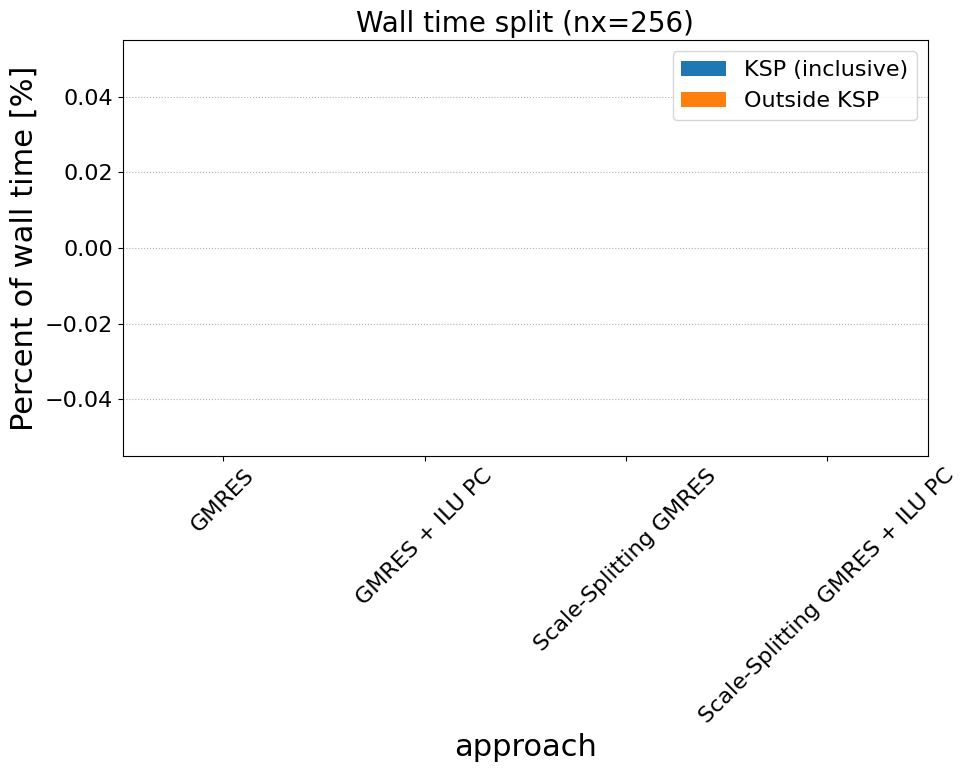

In [16]:
nx_target = int(df["nx"].max())
dft = df[(df["nx"] == nx_target) & (df["approach"].str.contains("GMRES"))].copy()

# 1) Share of wall time in KSP (inclusive) vs outside KSP
ksp_incl = dft["time_KSPSolve"].astype(float).clip(lower=0.0)
outside = (dft["time_total"].astype(float) - ksp_incl).clip(lower=0.0)

total_share = pd.DataFrame(
    {
        "KSP (inclusive)": ksp_incl,
        "Outside KSP": outside,
    },
    index=dft["approach"],
)

total_percent = 100.0 * total_share.div(dft["time_total"].values, axis=0)

ax = total_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 8),
    title=f"Wall time split (nx={nx_target})",
    rot=45,
)
ax.set_ylabel("Percent of wall time [%]")
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / f"time_split_ksp_vs_outside_nx{nx_target}.png")
plt.show()

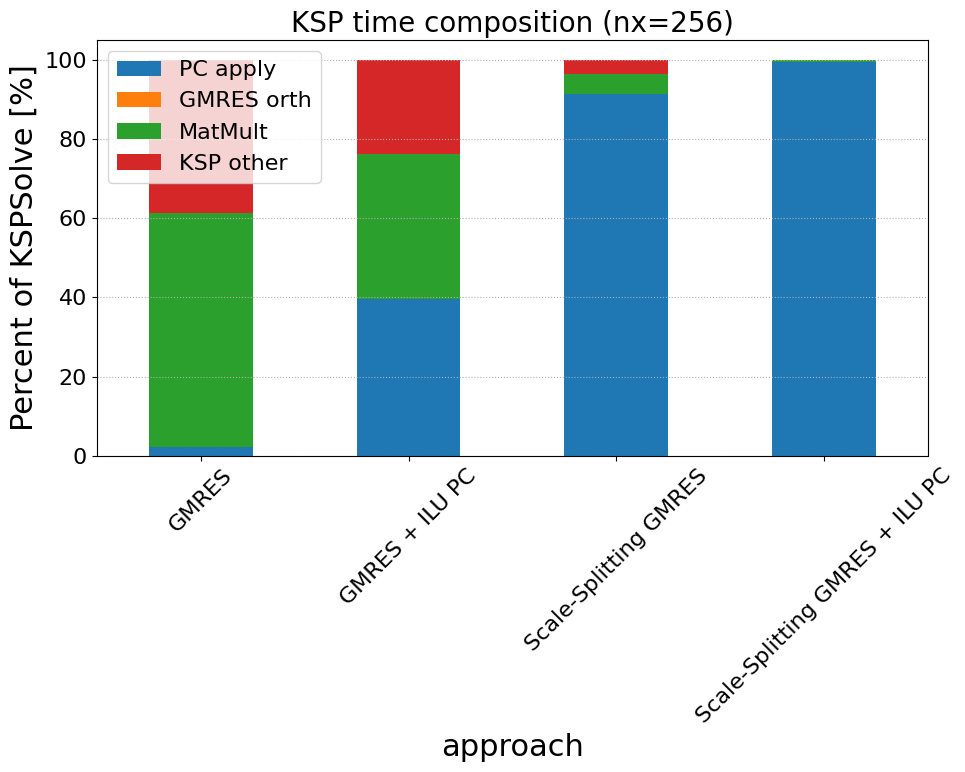

In [17]:
# 2) Inside-KSP breakdown (percent of KSPSolve)
def _ksp_breakdown_row(r):
    ksp = float(r.get("time_KSPSolve", 0.0))
    rem = max(ksp, 0.0)

    pcapply = float(r.get("time_PCApply", 0.0))
    gmres_orth = float(r.get("time_KSPGMRESOrthogonalization", 0.0)) + float(
        r.get("time_KSPGMRESBuildBasis", 0.0)
    )
    matmult = float(r.get("time_MatMult", 0.0))

    pcapply_ex = min(pcapply, rem)
    rem -= pcapply_ex
    gmres_orth_ex = min(gmres_orth, rem)
    rem -= gmres_orth_ex
    matmult_ex = min(matmult, rem)
    rem -= matmult_ex
    ksp_other = max(rem, 0.0)

    return pd.Series(
        {
            "PC apply": pcapply_ex,
            "GMRES orth": gmres_orth_ex,
            "MatMult": matmult_ex,
            "KSP other": ksp_other,
        }
    )


kparts = dft.apply(_ksp_breakdown_row, axis=1)
den = dft["time_KSPSolve"].replace(0, np.nan).values
kpercent = 100.0 * kparts.div(den, axis=0)

ax = kpercent.set_index(dft["approach"]).plot(
    kind="bar",
    stacked=True,
    figsize=(10, 8),
    title=f"KSP time composition (nx={nx_target})",
    rot=45,
)
ax.set_ylabel("Percent of KSPSolve [%]")
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / f"ksp_composition_percent_nx{nx_target}.png")
plt.show()

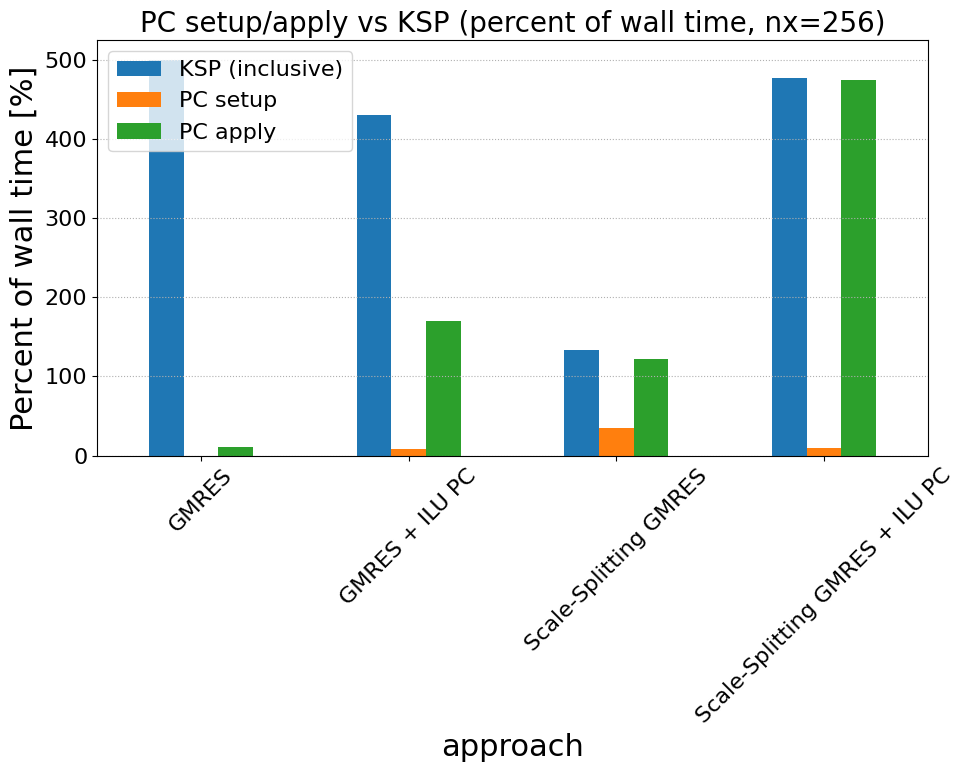

In [18]:
# Compare magnitudes (inclusive) as percent of wall time — NOT stacked
nx_target = int(df["nx"].max())
dft = df[(df["nx"] == nx_target) & (df["approach"].str.contains("GMRES"))].copy()

cmp = pd.DataFrame(
    {
        "approach": dft["approach"],
        "KSP (inclusive)": dft.get("time_KSPSolve", 0.0),
        "PC setup": dft.get("time_PCSetUp", 0.0),
        "PC apply": dft.get("time_PCApply", 0.0),
    }
)
percent = 100.0 * cmp.set_index("approach").div(dft["time_total"].values, axis=0)

ax = percent.plot(
    kind="bar",
    stacked=False,
    rot=45,
    figsize=(10, 8),
    title=f"PC setup/apply vs KSP (percent of wall time, nx={nx_target})",
)
ax.set_ylabel("Percent of wall time [%]")
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / f"pc_vs_ksp_wall_nx{nx_target}.png")
plt.show()

nx_target used: 256, rows: 4
Available time_* columns: ['time_KSPSolve', 'time_MatAssemblyBegin', 'time_MatAssemblyEnd', 'time_MatMult', 'time_PCApply', 'time_PCSetUp', 'time_SNESFunctionEval', 'time_SNESJacobianEval', 'time_SNESSolve', 'time_total', 'time_total_repeats']
Nonzero counts (abs): {'PC setup': 4, 'PC apply': 4, 'KSP (inclusive)': 4}


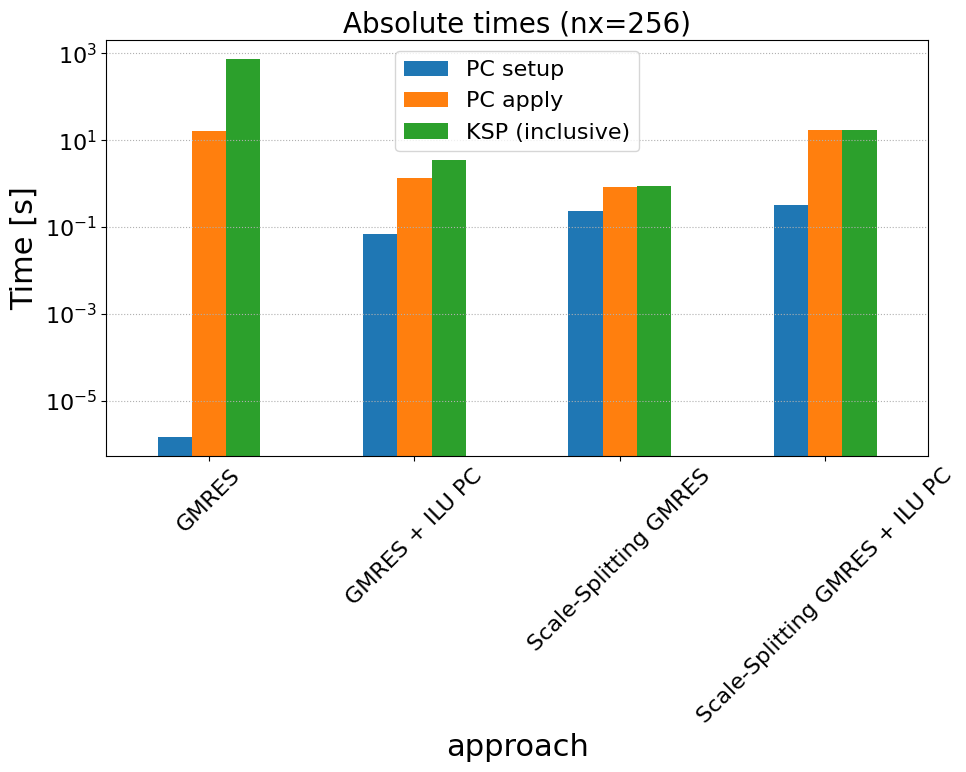

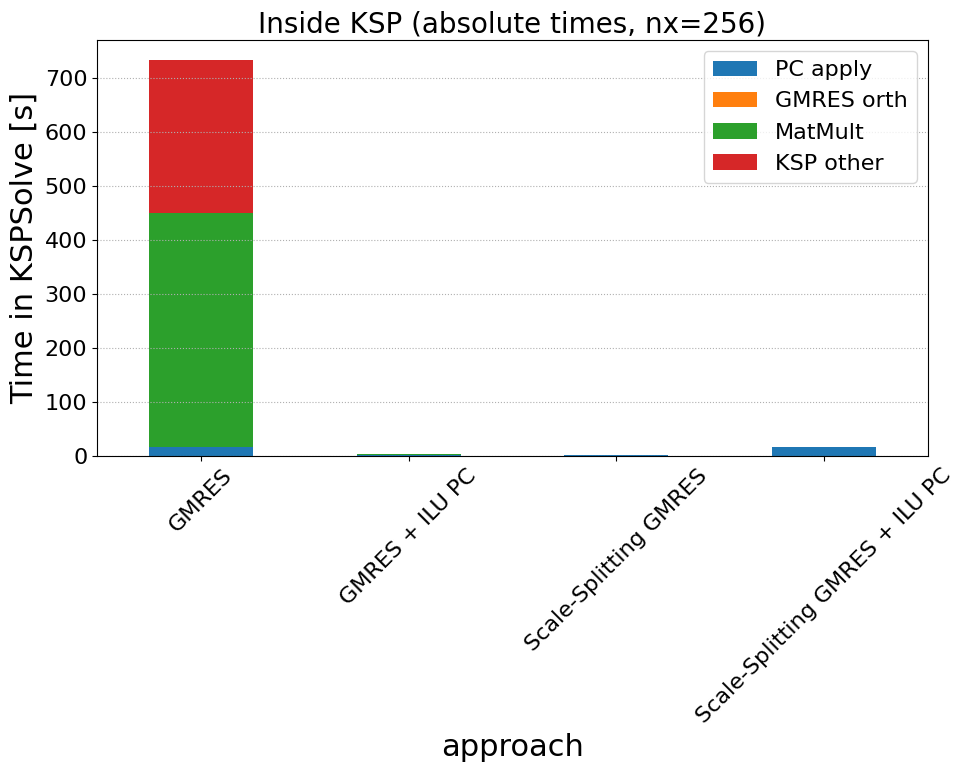

                      approach  time_total  time_KSPSolve  time_PCSetUp  time_PCApply  time_MatMult
                         GMRES  146.864603     733.836539      0.000001     16.402216    433.311162
                GMRES + ILU PC    0.796438       3.428829      0.070554      1.354999      1.260245
         Scale-Splitting GMRES    0.672024       0.894513      0.237219      0.818115      0.045694
Scale-Splitting GMRES + ILU PC    3.553459      16.931831      0.326411     16.865381      4.416830


In [24]:
def _num_col(df_, name):
    if name in df_:
        s = pd.to_numeric(df_[name], errors="coerce")
        return s.fillna(0.0).astype(float).clip(lower=0.0)
    return pd.Series(0.0, index=df_.index, dtype=float)


# 1) Pick the largest nx that actually has GMRES data
nx_all = pd.to_numeric(df["nx"], errors="coerce")
gmres_mask = df["approach"].astype(str).str.contains("GMRES", na=False)
nx_gmres = nx_all.where(gmres_mask)
if nx_gmres.notna().any():
    nx_target = int(nx_gmres.max())
else:
    nx_target = int(nx_all.max())  # fallback (no GMRES rows at all)

dft = df[(pd.to_numeric(df["nx"], errors="coerce") == nx_target) & gmres_mask].copy()

print(f"nx_target used: {nx_target}, rows: {len(dft)}")
print(
    "Available time_* columns:",
    sorted([c for c in dft.columns if str(c).startswith("time_")]),
)

if dft.empty:
    print("No GMRES rows at this nx. Nothing to plot.")
else:
    # 2) PC setup/apply/KSP (absolute times) — side-by-side (no stacking)
    pcsetup = _num_col(dft, "time_PCSetUp")
    pcapply = _num_col(dft, "time_PCApply")
    ksp_incl = _num_col(dft, "time_KSPSolve")

    abs_df = pd.DataFrame(
        {
            "approach": dft["approach"].astype(str).values,
            "PC setup": pcsetup.values,
            "PC apply": pcapply.values,
            "KSP (inclusive)": ksp_incl.values,
        }
    ).set_index("approach")

    print("Nonzero counts (abs):", (abs_df > 0).sum().to_dict())

    ax = abs_df.plot(
        kind="bar",
        stacked=False,
        rot=45,
        figsize=(10, 8),
        title=f"Absolute times (nx={nx_target})",
        logy=True,
    )
    ax.set_ylabel("Time [s]")
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"pc_setup_apply_ksp_absolute_nx{nx_target}.png")
    plt.show()

    # 3) Inside-KSP absolute breakdown (components sum to KSPSolve)
    pcapply = _num_col(dft, "time_PCApply")
    matmult = _num_col(dft, "time_MatMult")  # may be all zeros if not collected
    gmres_orth = _num_col(dft, "time_KSPGMRESOrthogonalization") + _num_col(
        dft, "time_KSPGMRESBuildBasis"
    )
    ksp = _num_col(dft, "time_KSPSolve")

    # Cap subparts so they never exceed KSPSolve and the stack sums to KSPSolve
    pcapply_ex = pd.concat([pcapply, ksp], axis=1).min(axis=1)
    rem = (ksp - pcapply_ex).clip(lower=0.0)
    gmres_orth_ex = pd.concat([gmres_orth, rem], axis=1).min(axis=1)
    rem = (rem - gmres_orth_ex).clip(lower=0.0)
    matmult_ex = pd.concat([matmult, rem], axis=1).min(axis=1)
    ksp_other = (rem - matmult_ex).clip(lower=0.0)

    kparts_abs = pd.DataFrame(
        {
            "approach": dft["approach"].astype(str).values,
            "PC apply": pcapply_ex.values,
            "GMRES orth": gmres_orth_ex.values,  # can be zero if events not recorded
            "MatMult": matmult_ex.values,
            "KSP other": ksp_other.values,
        }
    ).set_index("approach")

    # Sanity: sums equal KSPSolve within fp tolerance
    sum_parts = kparts_abs.sum(axis=1).values
    ksp_vals = ksp.values
    err = np.abs(sum_parts - ksp_vals)
    if not (
        np.all(err < 1e-9)
        | np.all(np.divide(err, np.where(ksp_vals == 0.0, np.nan, ksp_vals)) < 1e-6)
    ):
        print(
            "Warning: KSP parts do not sum to KSPSolve for some rows. Showing raw caps."
        )

    ax = kparts_abs.plot(
        kind="bar",
        stacked=True,
        rot=45,
        figsize=(10, 8),
        title=f"Inside KSP (absolute times, nx={nx_target})",
    )
    ax.set_ylabel("Time in KSPSolve [s]")
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"ksp_internal_absolute_nx{nx_target}.png")
    plt.show()

    # 4) Optional: print a compact table for the columns that actually exist
    cols_wanted = [
        "time_total",
        "time_KSPSolve",
        "time_PCSetUp",
        "time_PCApply",
        "time_MatMult",
        "time_KSPGMRESOrthogonalization",
        "time_KSPGMRESBuildBasis",
    ]
    cols_present = [c for c in cols_wanted if c in dft.columns]
    print(dft[["approach", *cols_present]].to_string(index=False))

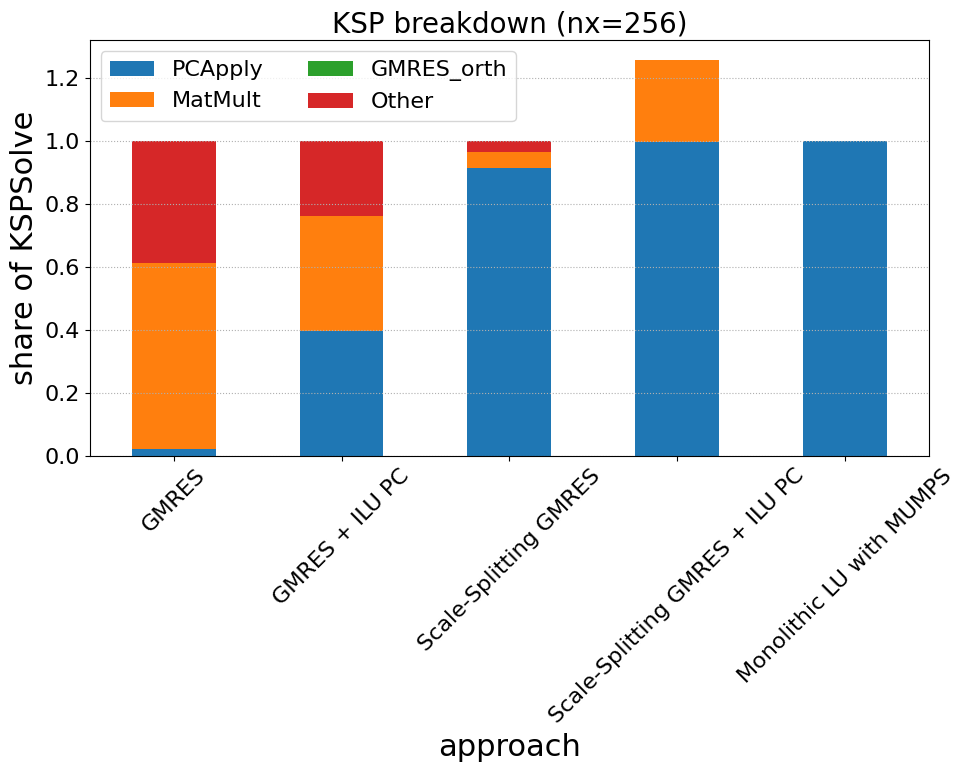

In [20]:
dft = df[(df["nx"] == nx_target) & (df["time_KSPSolve"] > 0)].copy()
gmres_known = (
    dft.get("time_PCApply", 0.0)
    + dft.get("time_MatMult", 0.0)
    + dft.get("time_KSPGMRESOrthogonalization", 0.0)
    + dft.get("time_KSPGMRESBuildBasis", 0.0)
)
ksp = dft["time_KSPSolve"].replace(0, np.nan)

kshare = pd.DataFrame(
    {
        "approach": dft["approach"],
        "PCApply": dft.get("time_PCApply", 0.0) / ksp,
        "MatMult": dft.get("time_MatMult", 0.0) / ksp,
        "GMRES_orth": (
            dft.get("time_KSPGMRESOrthogonalization", 0.0)
            + dft.get("time_KSPGMRESBuildBasis", 0.0)
        )
        / ksp,
    }
)
kshare["Other"] = ((dft["time_KSPSolve"] - gmres_known).clip(lower=0.0)) / ksp
ax = kshare.set_index("approach").plot(
    kind="bar",
    stacked=True,
    figsize=(10, 8),
    title=f"KSP breakdown (nx={nx_target})",
    rot=45,
)
ax.set_ylabel("share of KSPSolve")
ax.legend(loc="best", ncols=2)
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / f"ksp_breakdown_nx{nx_target}.png")
plt.show()

Time vs Memory:

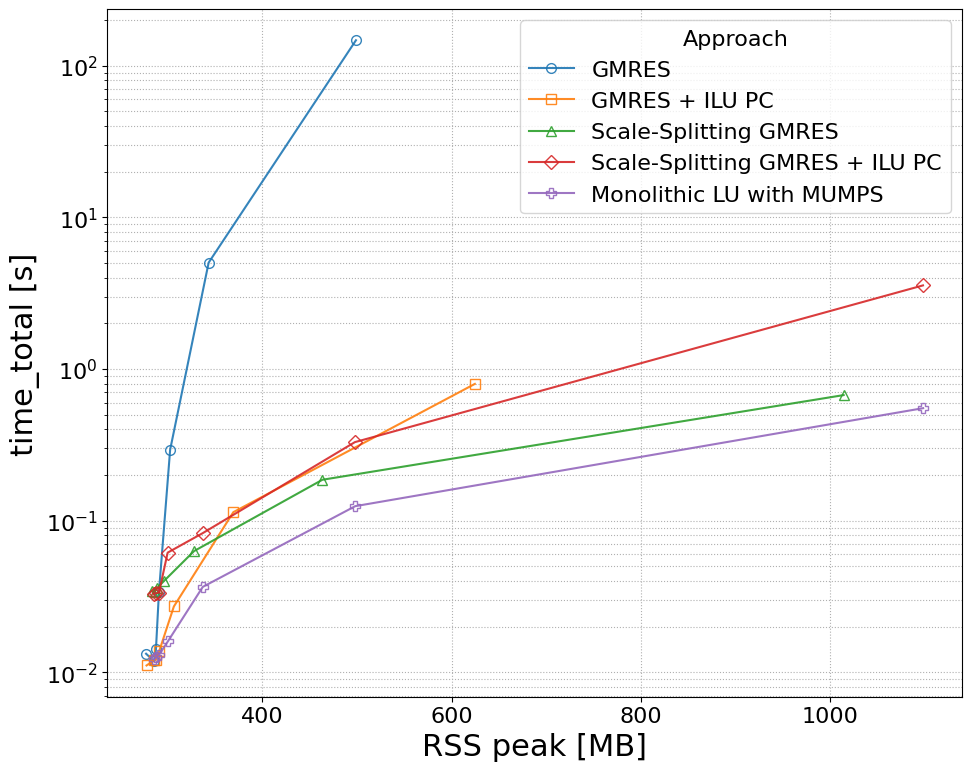

In [25]:
df_plot = df.assign(mem_mb=(df.get("mem_rss_peak_kb", np.nan) / 1024.0))

markers = ["o", "s", "^", "D", "P", "X", "*", "v", "<", ">", "h"]
approaches_in_order = list(
    dict.fromkeys(df_plot["approach"])
)  # preserve order of appearance
marker_map = {ap: markers[i % len(markers)] for i, ap in enumerate(approaches_in_order)}

fig, ax = plt.subplots(figsize=(10, 8))
for ap, sub in df_plot.groupby("approach", sort=False):
    sub = sub.sort_values("mem_mb")
    ax.plot(
        sub["mem_mb"],
        sub["time_total"],
        marker=marker_map[ap],
        markersize=7,
        markerfacecolor="none",
        linewidth=1.5,
        label=ap,
        alpha=0.9,
    )
# ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("RSS peak [MB]")
ax.set_ylabel("time_total [s]")
ax.grid(which="both", ls=":")
ax.legend(loc="best", title="Approach")
plt.tight_layout()
plt.savefig(RESULTS_PATH / "time_vs_memory_lines.png")
plt.show()

In [22]:
df

,approach,nx,ny,dofs,num_cells,iterations,residual,metadata,time_total,time_total_repeats,...,mflops_KSPSolve,flops_MatAssemblyEnd,mflops_MatAssemblyEnd,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_MatMult,mflops_MatMult,flops_total,mem_rss_peak_kb,mem_rss_delta_kb
0,GMRES,4,4,50,16,10,3.107972e-07,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.013247,0.066235,...,852.737933,0.0,0.0,0.0,0.0,6.510000e+04,3823.339402,8.851200e+05,283820.0,0.0
1,GMRES + ILU PC,4,4,50,16,5,1.936255e-05,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.011086,0.055430,...,588.505963,0.0,0.0,0.0,0.0,3.255000e+04,3471.629693,8.348100e+05,284316.0,496.0
2,Scale-Splitting GMRES,4,4,50,16,4,4.775965e-05,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.034299,0.171495,...,25.131557,0.0,0.0,0.0,0.0,3.386500e+04,2195.888990,9.144150e+05,290076.0,2304.0
3,Scale-Splitting GMRES + ILU PC,4,4,50,16,4,4.775968e-05,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.032740,0.163698,...,414.296387,0.0,0.0,0.0,0.0,9.646500e+04,3053.849563,1.581590e+06,292764.0,2112.0
4,Monolithic LU with MUMPS,4,4,50,16,1,0.000000e+00,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.012274,0.061371,...,26.652207,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,5.946000e+05,292764.0,0.0
5,GMRES,8,8,162,64,40,3.795447e-04,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.011786,0.058928,...,4498.309281,0.0,0.0,0.0,0.0,9.917900e+05,5541.809851,8.905370e+06,292764.0,0.0
6,GMRES + ILU PC,8,8,162,64,7,2.493865e-03,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.012001,0.060006,...,2041.666316,0.0,0.0,0.0,0.0,1.693300e+05,4832.890944,3.715780e+06,292764.0,0.0
7,Scale-Splitting GMRES,8,8,162,64,4,4.663785e-03,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.034046,0.170229,...,94.950492,0.0,0.0,0.0,0.0,1.259850e+05,3508.354219,3.762305e+06,292956.0,192.0
8,Scale-Splitting GMRES + ILU PC,8,8,162,64,4,4.663785e-03,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.033188,0.165940,...,1596.193866,0.0,0.0,0.0,0.0,5.000650e+05,4590.110516,7.789820e+06,294300.0,1152.0
9,Monolithic LU with MUMPS,8,8,162,64,1,0.000000e+00,"{'petsc_version': (3, 23, 4), 'firedrake_versi...",0.012516,0.062582,...,105.041308,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,2.471880e+06,294492.0,0.0
